In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# DataSet 2001

In [10]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2001.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.340000,NaN,NaN,28079001
1,2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.110000,1.24,10.82,28079035
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.850000,NaN,NaN,28079003
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.460000,NaN,NaN,28079004
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.800000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217867,2001-04-01 00:00:00,10.45,1.81,NaN,NaN,NaN,73.000000,264.399994,NaN,5.200000,47.880001,NaN,39.910000,NaN,28.35,28079022
217868,2001-04-01 00:00:00,5.20,0.69,4.56,NaN,0.13,71.080002,129.300003,NaN,13.460000,26.809999,NaN,13.450000,1.32,16.08,28079023
217869,2001-04-01 00:00:00,0.49,1.09,NaN,1.00,0.19,76.279999,128.399994,0.35,5.020000,40.770000,0.61,14.700000,1.40,1.55,28079024
217870,2001-04-01 00:00:00,5.62,1.01,5.04,11.38,NaN,80.019997,197.000000,2.58,5.840000,37.889999,4.31,39.919998,NaN,20.75,28079025


In [11]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217872 entries, 0 to 217871
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     217872 non-null  object 
 1   BEN      70389 non-null   float64
 2   CO       216341 non-null  float64
 3   EBE      57752 non-null   float64
 4   MXY      42753 non-null   float64
 5   NMHC     85719 non-null   float64
 6   NO_2     216331 non-null  float64
 7   NOx      216318 non-null  float64
 8   OXY      42856 non-null   float64
 9   O_3      216514 non-null  float64
 10  PM10     207776 non-null  float64
 11  PXY      42845 non-null   float64
 12  SO_2     216403 non-null  float64
 13  TCH      85797 non-null   float64
 14  TOL      70196 non-null   float64
 15  station  217872 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 26.6+ MB


In [12]:
b=a.iloc[:,1:16]
b

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.340000,NaN,NaN,28079001
1,1.50,0.34,1.49,4.10,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.110000,1.24,10.82,28079035
2,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.850000,NaN,NaN,28079003
3,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.460000,NaN,NaN,28079004
4,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.800000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217867,10.45,1.81,NaN,NaN,NaN,73.000000,264.399994,NaN,5.200000,47.880001,NaN,39.910000,NaN,28.35,28079022
217868,5.20,0.69,4.56,NaN,0.13,71.080002,129.300003,NaN,13.460000,26.809999,NaN,13.450000,1.32,16.08,28079023
217869,0.49,1.09,NaN,1.00,0.19,76.279999,128.399994,0.35,5.020000,40.770000,0.61,14.700000,1.40,1.55,28079024
217870,5.62,1.01,5.04,11.38,NaN,80.019997,197.000000,2.58,5.840000,37.889999,4.31,39.919998,NaN,20.75,28079025


In [14]:
c=b.fillna(value=10)
c

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,10.00,0.37,10.00,10.00,10.00,58.400002,87.150002,10.00,34.529999,105.000000,10.00,6.340000,10.00,10.00,28079001
1,1.50,0.34,1.49,4.10,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.110000,1.24,10.82,28079035
2,10.00,0.28,10.00,10.00,10.00,50.660000,61.380001,10.00,46.310001,100.099998,10.00,7.850000,10.00,10.00,28079003
3,10.00,0.47,10.00,10.00,10.00,69.790001,73.449997,10.00,40.650002,69.779999,10.00,6.460000,10.00,10.00,28079004
4,10.00,0.39,10.00,10.00,10.00,22.830000,24.799999,10.00,66.309998,75.180000,10.00,8.800000,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217867,10.45,1.81,10.00,10.00,10.00,73.000000,264.399994,10.00,5.200000,47.880001,10.00,39.910000,10.00,28.35,28079022
217868,5.20,0.69,4.56,10.00,0.13,71.080002,129.300003,10.00,13.460000,26.809999,10.00,13.450000,1.32,16.08,28079023
217869,0.49,1.09,10.00,1.00,0.19,76.279999,128.399994,0.35,5.020000,40.770000,0.61,14.700000,1.40,1.55,28079024
217870,5.62,1.01,5.04,11.38,10.00,80.019997,197.000000,2.58,5.840000,37.889999,4.31,39.919998,10.00,20.75,28079025


In [15]:
d=c.head(1000)
d

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,10.00,0.37,10.00,10.0,10.00,58.400002,87.150002,10.00,34.529999,105.000000,10.00,6.34,10.00,10.00,28079001
1,1.50,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035
2,10.00,0.28,10.00,10.0,10.00,50.660000,61.380001,10.00,46.310001,100.099998,10.00,7.85,10.00,10.00,28079003
3,10.00,0.47,10.00,10.0,10.00,69.790001,73.449997,10.00,40.650002,69.779999,10.00,6.46,10.00,10.00,28079004
4,10.00,0.39,10.00,10.0,10.00,22.830000,24.799999,10.00,66.309998,75.180000,10.00,8.80,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.00,0.09,10.00,10.0,0.09,27.670000,33.189999,10.00,93.559998,30.309999,10.00,3.33,1.24,10.00,28079040
996,10.00,0.41,10.00,10.0,10.00,45.639999,62.180000,10.00,86.820000,44.279999,10.00,6.77,10.00,10.00,28079014
997,1.28,0.35,1.68,10.0,0.10,51.560001,84.430000,10.00,56.520000,50.509998,10.00,3.15,1.32,9.24,28079015
998,10.00,0.11,10.00,10.0,10.00,33.270000,42.939999,10.00,93.910004,25.760000,10.00,5.18,10.00,10.00,28079016


In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BEN      1000 non-null   float64
 1   CO       1000 non-null   float64
 2   EBE      1000 non-null   float64
 3   MXY      1000 non-null   float64
 4   NMHC     1000 non-null   float64
 5   NO_2     1000 non-null   float64
 6   NOx      1000 non-null   float64
 7   OXY      1000 non-null   float64
 8   O_3      1000 non-null   float64
 9   PM10     1000 non-null   float64
 10  PXY      1000 non-null   float64
 11  SO_2     1000 non-null   float64
 12  TCH      1000 non-null   float64
 13  TOL      1000 non-null   float64
 14  station  1000 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 117.3 KB


In [86]:
x=d.iloc[:,0:8]
y=d.iloc[:,-1]

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [88]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
print(lr.intercept_)

28079043.736337237


In [90]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-0.354575
CO,5.225233
EBE,1.175599
MXY,1.557139
NMHC,-0.458204
NO_2,0.150582
NOx,-0.139483
OXY,-4.611251


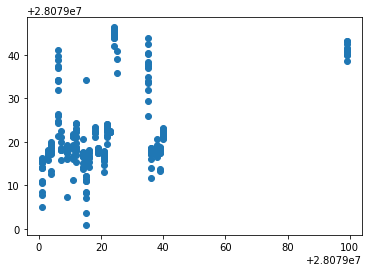

In [91]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [92]:
# Score

print(lr.score(x_test,y_test))

0.16809035279536877


In [93]:
print(lr.score(x_train,y_train))

0.24000057614547987


In [48]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [49]:
#Ridge Score
rr.score(x_test,y_test)

0.1543236306504513

In [50]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [51]:
# Lasso Score
la.score(x_test,y_test)

0.1490947269860846

In [52]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [53]:
print(en.coef_)

[-0.30140331  0.          0.01083513  0.45412416 -0.52144991  0.12553503
 -0.10229624 -2.47434287]


In [54]:
print(en.intercept_)

28079046.113537744


In [55]:
print(en.predict(x_test))

[28079018.12425219 28079018.69229512 28079023.3042553  28079023.31278301
 28079016.44537006 28079018.29665894 28079017.37686087 28079017.91740651
 28079017.68642892 28079018.77686615 28079023.39216185 28079013.61255332
 28079019.3947485  28079018.0637059  28079022.9456352  28079018.2918448
 28079017.28391335 28079020.6101897  28079017.88116506 28079030.92878928
 28079015.89046114 28079023.07046796 28079039.22906796 28079040.31500786
 28079025.54158949 28079018.09935712 28079023.34933219 28079017.51825965
 28079018.0887378  28079019.68473243 28079017.14674241 28079023.99482337
 28079017.10889808 28079018.88082786 28079037.64093079 28079017.94135633
 28079044.49431684 28079023.15172463 28079016.48664434 28079017.49333946
 28079022.99175172 28079018.17111727 28079022.81448707 28079017.20956006
 28079023.11472886 28079028.75252462 28079025.17525315 28079017.96443815
 28079014.94912228 28079017.24688481 28079017.49072197 28079025.77488532
 28079023.03708061 28079023.11735294 28079018.473369

In [56]:
print(en.score(x_test,y_test))

0.14887184829153666


In [57]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [65]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [66]:
observation=[[12,45,54,87,78,15,39,64]]
prediction=logr.predict(observation)

In [67]:
print(prediction)

[28079022]


In [68]:
logr.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079009,
       28079011, 28079012, 28079014, 28079015, 28079016, 28079018,
       28079019, 28079021, 28079022, 28079023, 28079024, 28079025,
       28079035, 28079036, 28079038, 28079039, 28079040, 28079099],
      dtype=int64)

In [69]:
logr.predict_proba(observation)[0][0]

0.00017132499299561286

In [77]:
#Random Forest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,13,20,45],
           'n_estimators':[12,51,32,42,65]}

In [79]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 13, 20, 45],
                         'n_estimators': [12, 51, 32, 42, 65]},
             scoring='accuracy')

In [80]:
grid_search.best_score_

0.46714285714285714

In [81]:
rfc_best=grid_search.best_estimator_

[Text(1844.4999999999998, 1494.8999999999999, 'X[4] <= 5.26\ngini = 0.957\nsamples = 436\nvalue = [35, 26, 36, 23, 28, 36, 32, 24, 26, 29, 22, 27\n22, 22, 31, 38, 31, 32, 24, 36, 25, 36, 30, 29]'),
 Text(1012.6666666666666, 1223.1, 'X[7] <= 9.49\ngini = 0.906\nsamples = 190\nvalue = [0, 0, 0, 23, 20, 0, 32, 24, 0, 29, 0, 27, 0\n0, 0, 38, 31, 0, 24, 0, 0, 0, 30, 29]'),
 Text(578.6666666666666, 951.3, 'X[3] <= 1.665\ngini = 0.745\nsamples = 68\nvalue = [0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 31, 0, 24, 0, 0, 0, 0, 29]'),
 Text(289.3333333333333, 679.4999999999999, 'X[5] <= 17.835\ngini = 0.083\nsamples = 15\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 22, 0, 1, 0, 0, 0, 0, 0]'),
 Text(144.66666666666666, 407.6999999999998, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 14, 0, 0, 0, 0, 0, 0, 0]'),
 Text(434.0, 407.6999999999998, 'gini = 0.198\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 8, 0, 1, 0, 0, 0, 

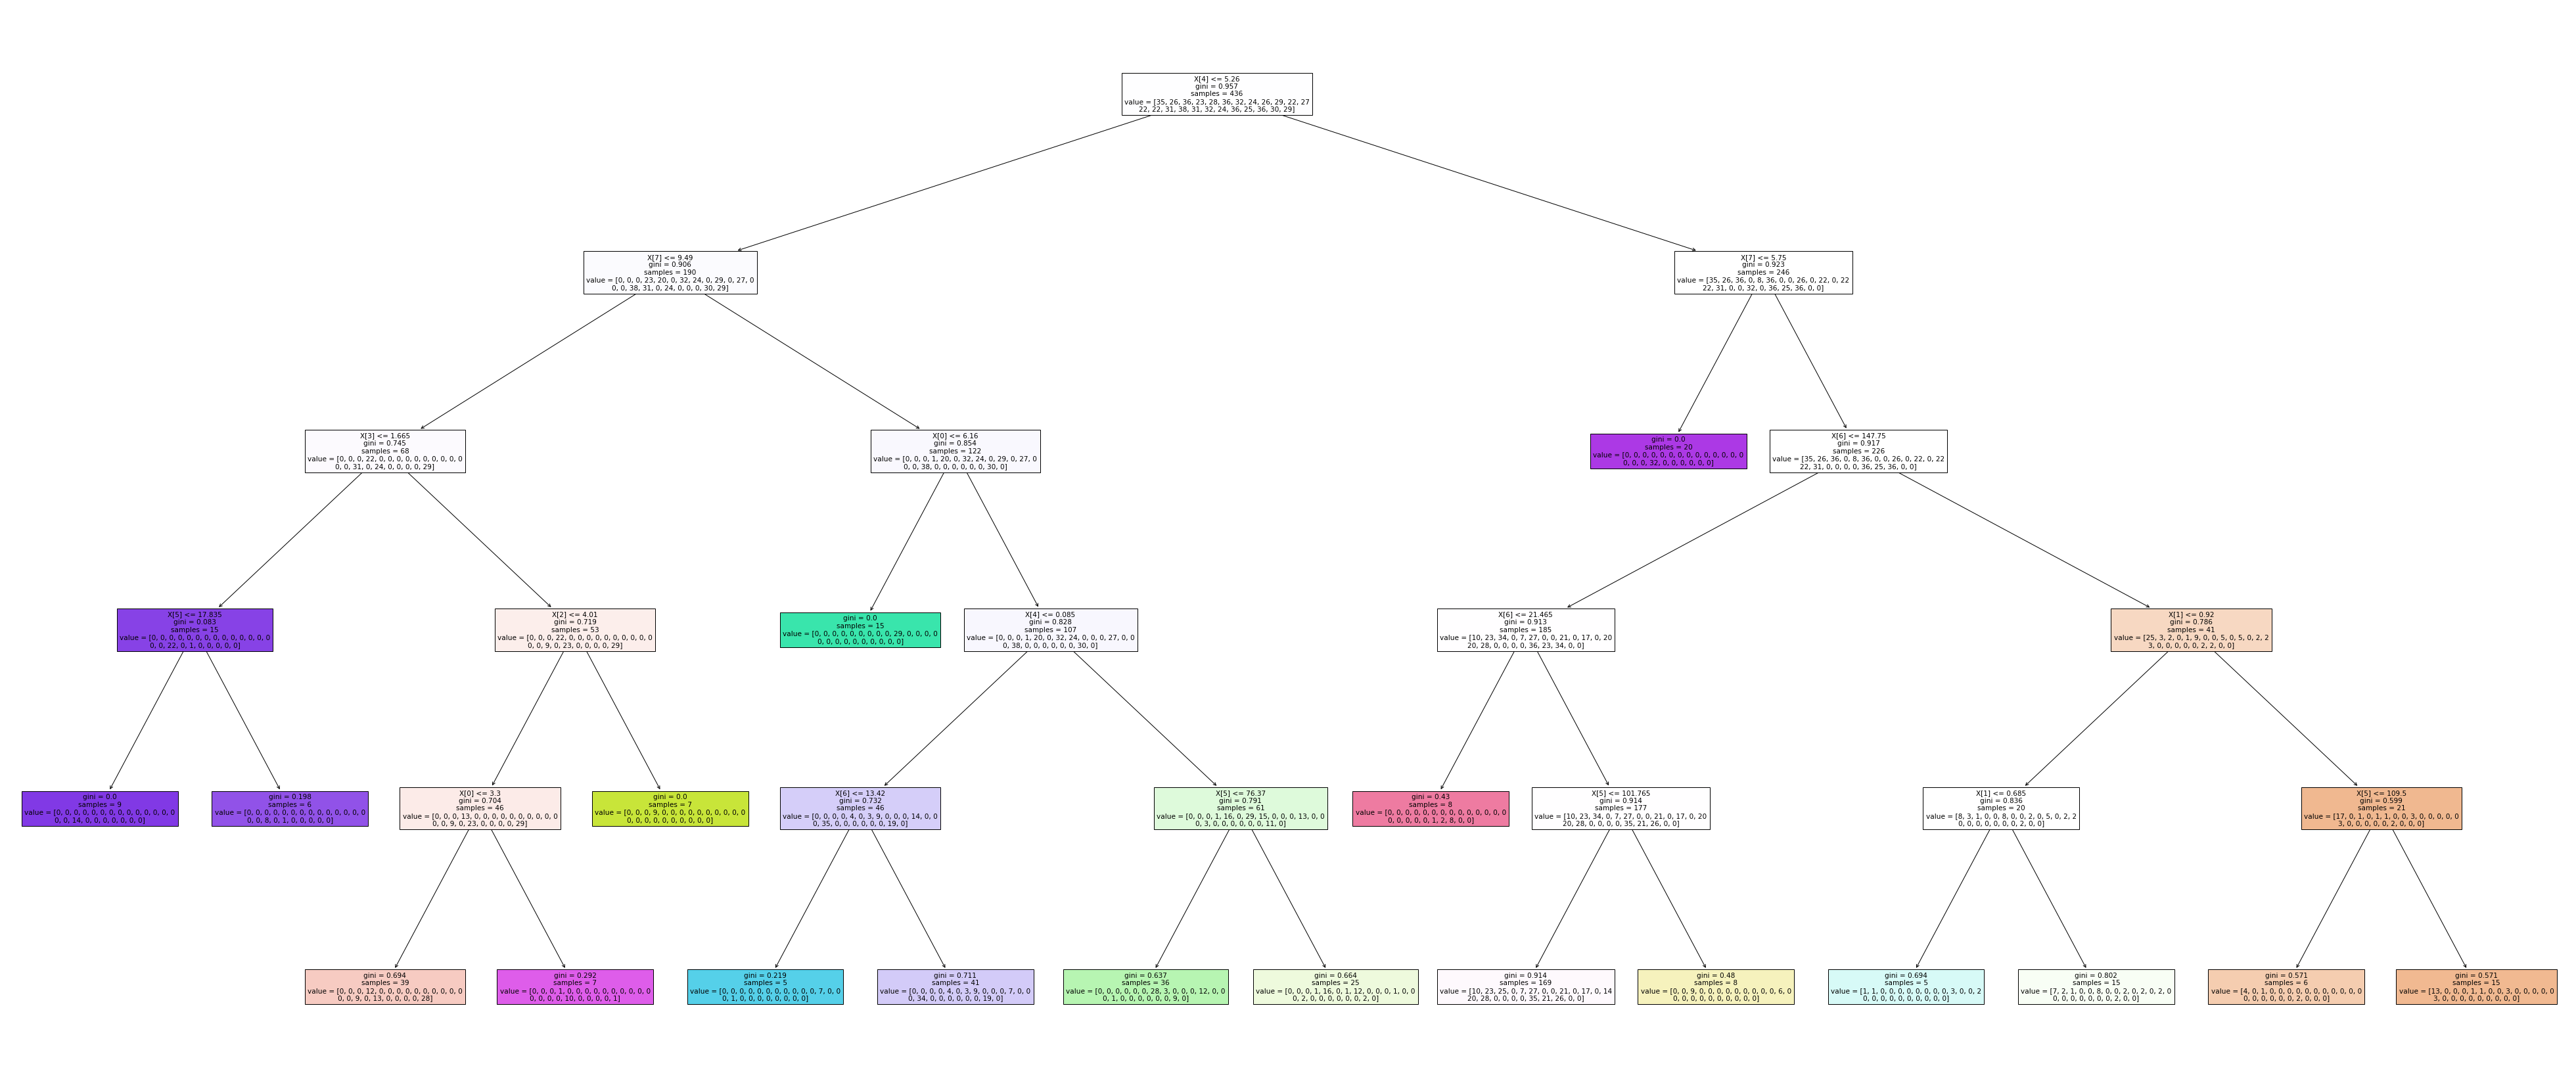

In [82]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: Linear Score=0.24000057614547987,Ridge score=0.1543236306504513,Lasso score=0.1490947269860846,ElasticNet Score=0.14887184829153666,Logistic Score=0.00017132499299561286,RandomForest Score=0.46714285714285714.So,RandomForest has Highest accuracy

# DataSet 2002

In [83]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2002.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2002-04-01 01:00:00,NaN,1.39,NaN,NaN,NaN,145.100006,352.100006,NaN,6.54,41.990002,NaN,21.320000,NaN,NaN,28079001
1,2002-04-01 01:00:00,1.93,0.71,2.33,6.20,0.15,98.150002,153.399994,2.67,6.85,20.980000,2.53,11.660000,1.82,10.980000,28079035
2,2002-04-01 01:00:00,NaN,0.80,NaN,NaN,NaN,103.699997,134.000000,NaN,13.01,28.440001,NaN,13.670000,NaN,NaN,28079003
3,2002-04-01 01:00:00,NaN,1.61,NaN,NaN,NaN,97.599998,268.000000,NaN,5.12,42.180000,NaN,16.990000,NaN,NaN,28079004
4,2002-04-01 01:00:00,NaN,1.90,NaN,NaN,NaN,92.089996,237.199997,NaN,7.28,76.330002,NaN,15.260000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217291,2002-11-01 00:00:00,4.16,1.14,NaN,NaN,NaN,81.080002,265.700012,NaN,7.21,36.750000,NaN,13.210000,NaN,NaN,28079022
217292,2002-11-01 00:00:00,3.67,1.73,2.89,NaN,0.38,113.900002,373.100006,NaN,5.66,63.389999,NaN,15.640000,1.78,15.690000,28079023
217293,2002-11-01 00:00:00,1.37,0.58,1.17,2.37,0.15,65.389999,107.699997,1.30,9.11,9.640000,0.94,5.620000,1.43,4.330000,28079024
217294,2002-11-01 00:00:00,4.51,0.91,4.83,10.99,NaN,149.800003,202.199997,1.00,5.75,NaN,5.52,24.219999,NaN,22.129999,28079025


In [84]:
a=a.head(10000)
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2002-04-01 01:00:00,NaN,1.39,NaN,NaN,NaN,145.100006,352.100006,NaN,6.540000,41.990002,NaN,21.32,NaN,NaN,28079001
1,2002-04-01 01:00:00,1.93,0.71,2.33,6.20,0.15,98.150002,153.399994,2.67,6.850000,20.980000,2.53,11.66,1.82,10.980000,28079035
2,2002-04-01 01:00:00,NaN,0.80,NaN,NaN,NaN,103.699997,134.000000,NaN,13.010000,28.440001,NaN,13.67,NaN,NaN,28079003
3,2002-04-01 01:00:00,NaN,1.61,NaN,NaN,NaN,97.599998,268.000000,NaN,5.120000,42.180000,NaN,16.99,NaN,NaN,28079004
4,2002-04-01 01:00:00,NaN,1.90,NaN,NaN,NaN,92.089996,237.199997,NaN,7.280000,76.330002,NaN,15.26,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2002-04-17 16:00:00,0.87,0.18,NaN,NaN,NaN,30.370001,38.220001,NaN,99.330002,25.670000,NaN,5.73,NaN,3.500000,28079022
9996,2002-04-17 16:00:00,1.71,0.47,3.25,NaN,0.24,56.180000,67.599998,NaN,71.169998,48.450001,NaN,10.17,1.53,17.450001,28079023
9997,2002-04-17 16:00:00,0.26,0.47,0.97,1.60,0.09,13.370000,14.700000,0.75,94.690002,21.820000,0.54,1.94,1.30,3.640000,28079024
9998,2002-04-17 16:00:00,0.82,0.19,0.80,1.32,NaN,26.120001,28.969999,0.72,79.190002,NaN,0.61,12.50,NaN,4.200000,28079025


In [94]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     10000 non-null  object 
 1   BEN      3158 non-null   float64
 2   CO       9977 non-null   float64
 3   EBE      2779 non-null   float64
 4   MXY      1984 non-null   float64
 5   NMHC     3980 non-null   float64
 6   NO_2     9972 non-null   float64
 7   NOx      9972 non-null   float64
 8   OXY      1984 non-null   float64
 9   O_3      9980 non-null   float64
 10  PM10     9569 non-null   float64
 11  PXY      1984 non-null   float64
 12  SO_2     9974 non-null   float64
 13  TCH      3980 non-null   float64
 14  TOL      3153 non-null   float64
 15  station  10000 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 1.2+ MB


In [95]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
1,2002-04-01 01:00:00,1.93,0.71,2.33,6.200000,0.15,98.150002,153.399994,2.67,6.850000,20.980000,2.53,11.66,1.82,10.980000,28079035
5,2002-04-01 01:00:00,3.19,0.72,3.23,7.650000,0.11,113.699997,187.000000,3.53,12.370000,27.450001,2.98,14.78,1.83,15.600000,28079006
22,2002-04-01 01:00:00,2.02,0.80,1.57,3.660000,0.15,93.860001,101.300003,1.77,6.990000,33.000000,1.48,1.98,1.54,7.320000,28079024
24,2002-04-01 01:00:00,3.02,1.04,2.43,5.380000,0.21,103.699997,195.399994,2.15,14.040000,37.310001,2.18,15.91,1.79,11.420000,28079099
26,2002-04-01 02:00:00,2.02,0.53,2.24,5.970000,0.12,91.599998,136.199997,2.55,6.760000,19.980000,2.45,10.15,2.08,10.600000,28079035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,2002-04-17 15:00:00,2.19,0.65,3.50,9.520000,0.24,71.500000,105.900002,3.99,70.339996,44.590000,3.56,12.52,1.62,14.430000,28079099
9976,2002-04-17 16:00:00,2.91,0.78,3.66,9.480000,0.14,98.830002,169.500000,3.51,50.720001,27.900000,3.65,16.58,1.39,16.799999,28079035
9980,2002-04-17 16:00:00,6.21,0.71,7.92,19.870001,0.11,79.580002,146.000000,8.70,71.830002,46.009998,7.46,15.98,1.38,35.330002,28079006
9997,2002-04-17 16:00:00,0.26,0.47,0.97,1.600000,0.09,13.370000,14.700000,0.75,94.690002,21.820000,0.54,1.94,1.30,3.640000,28079024


In [96]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1581 entries, 1 to 9999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     1581 non-null   object 
 1   BEN      1581 non-null   float64
 2   CO       1581 non-null   float64
 3   EBE      1581 non-null   float64
 4   MXY      1581 non-null   float64
 5   NMHC     1581 non-null   float64
 6   NO_2     1581 non-null   float64
 7   NOx      1581 non-null   float64
 8   OXY      1581 non-null   float64
 9   O_3      1581 non-null   float64
 10  PM10     1581 non-null   float64
 11  PXY      1581 non-null   float64
 12  SO_2     1581 non-null   float64
 13  TCH      1581 non-null   float64
 14  TOL      1581 non-null   float64
 15  station  1581 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 210.0+ KB


In [137]:
x=b.iloc[:,1:15]
y=b.iloc[:,-1]

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [139]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [140]:
print(lr.intercept_)

28078991.03639512


In [141]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,8.878813
CO,-60.779402
EBE,-27.151480
MXY,14.908095
NMHC,305.469381
NO_2,0.130137
NOx,-0.051041
OXY,-27.893971
O_3,0.012955
PM10,-0.043538


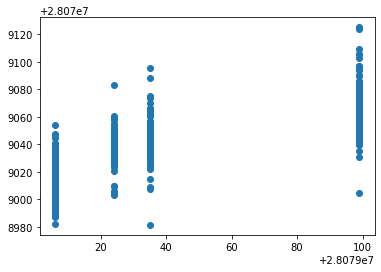

In [142]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [143]:
# Score

print(lr.score(x_test,y_test))

0.5115611110681977


In [144]:
print(lr.score(x_train,y_train))

0.4543147921537596


In [145]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [146]:
#Ridge Score
rr.score(x_test,y_test)

0.42347117330811157

In [147]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [148]:
# Lasso Score
la.score(x_test,y_test)

0.11853371443832339

In [149]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [150]:
print(en.coef_)

[-0.          0.         -2.38117286  3.73685269  0.26789058  0.31982138
 -0.09782792 -1.00077045 -0.04384974  0.34762508  0.94158688  1.03171845
  0.78727138 -3.69532342]


In [151]:
print(en.intercept_)

28079035.158478666


In [152]:
print(en.predict(x_test))

[28079048.31696727 28079048.66832222 28079052.2918995  28079047.93239336
 28079035.36821539 28079033.73339936 28079021.27287658 28079036.52145837
 28079050.50068785 28079046.82552442 28079035.82043847 28079032.45556665
 28079046.03514552 28079054.45597995 28079043.77411197 28079043.72170662
 28079061.47610332 28079036.10020496 28079049.28869395 28079039.53884739
 28079039.98806009 28079032.89577102 28079047.81573358 28079033.29459925
 28079051.38376877 28079033.39885642 28079031.8663815  28079055.9220028
 28079048.47732411 28079032.1791631  28079051.02536453 28079037.83433321
 28079037.60273741 28079056.10851012 28079050.07840853 28079037.41449861
 28079039.16001315 28079050.25931937 28079054.34068066 28079049.98174106
 28079036.37230656 28079048.22248652 28079057.58300627 28079046.96615028
 28079006.71762909 28079019.1315434  28079048.79366451 28079047.99848279
 28079057.70782474 28079051.51953984 28079036.78705787 28079031.0461506
 28079027.0704982  28079054.68193116 28079055.0039903

In [153]:
print(en.score(x_test,y_test))

0.19838400160483904


In [154]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [155]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [156]:
observation=[[54,85,48,23,78,56,64,23,21,89,87,28,25,38]]
prediction=logr.predict(observation)

In [157]:
print(prediction)

[28079099]


In [158]:
logr.classes_

array([28079006, 28079024, 28079035, 28079099], dtype=int64)

In [159]:
logr.predict_proba(observation)[0][0]

2.5677819727944078e-107

In [160]:
print(logr.score(x_test,y_test))

0.2505263157894737


In [126]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [127]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,45,62,51],
           'n_estimators':[12,51,54,14,65]}

In [128]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 45, 62, 51],
                         'n_estimators': [12, 51, 54, 14, 65]},
             scoring='accuracy')

In [129]:
grid_search.best_score_

0.8508137432188065

In [130]:
rfc_best=grid_search.best_estimator_

[Text(1953.0, 1494.8999999999999, 'X[11] <= 4.935\ngini = 0.75\nsamples = 690\nvalue = [297, 268, 270, 271]'),
 Text(1796.7600000000002, 1223.1, 'gini = 0.0\nsamples = 167\nvalue = [0, 268, 0, 0]'),
 Text(2109.2400000000002, 1223.1, 'X[12] <= 1.285\ngini = 0.666\nsamples = 523\nvalue = [297, 0, 270, 271]'),
 Text(1171.8000000000002, 951.3, 'X[7] <= 2.42\ngini = 0.519\nsamples = 172\nvalue = [99, 0, 172, 16]'),
 Text(624.96, 679.4999999999999, 'X[5] <= 41.825\ngini = 0.426\nsamples = 117\nvalue = [36, 0, 140, 16]'),
 Text(312.48, 407.6999999999998, 'X[2] <= 0.965\ngini = 0.582\nsamples = 60\nvalue = [26, 0, 54, 16]'),
 Text(156.24, 135.89999999999986, 'gini = 0.363\nsamples = 41\nvalue = [2, 0, 51, 13]'),
 Text(468.72, 135.89999999999986, 'gini = 0.34\nsamples = 19\nvalue = [24, 0, 3, 3]'),
 Text(937.44, 407.6999999999998, 'X[13] <= 3.665\ngini = 0.187\nsamples = 57\nvalue = [10, 0, 86, 0]'),
 Text(781.2, 135.89999999999986, 'gini = 0.426\nsamples = 9\nvalue = [4, 0, 9, 0]'),
 Text(1093

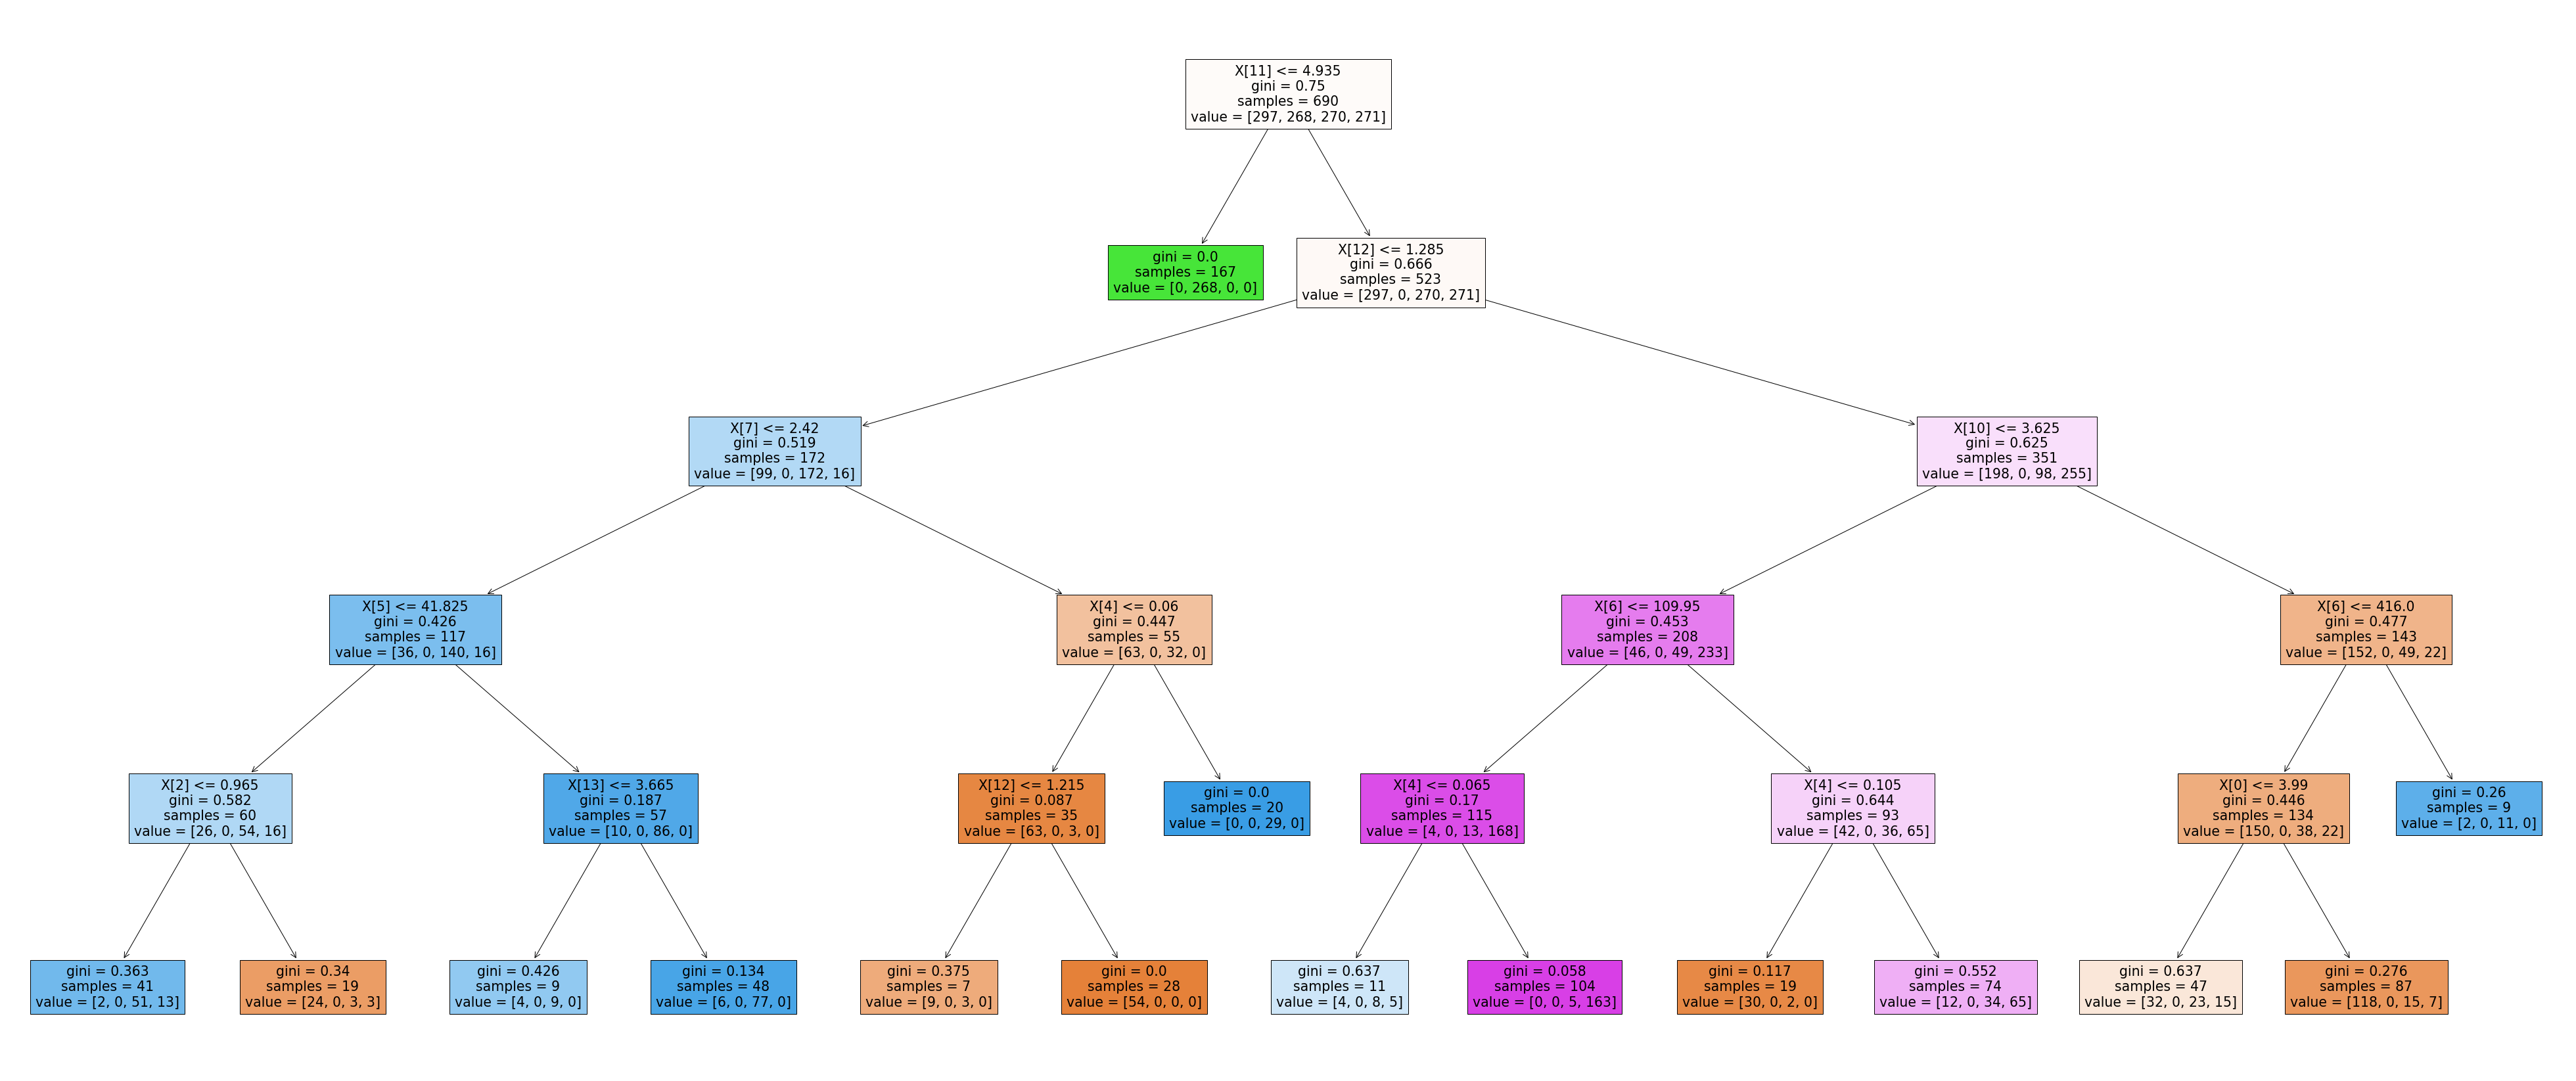

In [132]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

As per the score,RandomForest has Highest accuracy.Random Score=0.8508137432188065

# DataSet 2003

In [134]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2003.csv")
a=a.head(10000)
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2003-03-01 01:00:00,NaN,1.72,NaN,NaN,NaN,73.900002,316.299988,NaN,10.550000,55.209999,NaN,24.299999,NaN,NaN,28079001
1,2003-03-01 01:00:00,NaN,1.45,NaN,NaN,0.26,72.110001,250.000000,0.73,6.720000,52.389999,NaN,14.230000,1.55,NaN,28079035
2,2003-03-01 01:00:00,NaN,1.57,NaN,NaN,NaN,80.559998,224.199997,NaN,21.049999,63.240002,NaN,17.879999,NaN,NaN,28079003
3,2003-03-01 01:00:00,NaN,2.45,NaN,NaN,NaN,78.370003,450.399994,NaN,4.220000,67.839996,NaN,24.900000,NaN,NaN,28079004
4,2003-03-01 01:00:00,NaN,3.26,NaN,NaN,NaN,96.250000,479.100006,NaN,8.460000,95.779999,NaN,18.750000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2003-03-15 21:00:00,2.21,1.22,1.55,3.14,0.24,92.339996,167.500000,1.75,14.850000,115.199997,1.44,17.250000,1.48,8.39,28079099
9996,2003-03-15 22:00:00,NaN,1.30,NaN,NaN,NaN,104.500000,189.600006,NaN,11.550000,125.599998,NaN,19.700001,NaN,NaN,28079001
9997,2003-03-15 22:00:00,2.68,1.26,2.89,7.52,0.18,79.010002,188.500000,3.74,11.220000,129.500000,3.02,13.970000,1.55,15.50,28079035
9998,2003-03-15 22:00:00,NaN,0.67,NaN,NaN,NaN,63.430000,68.739998,NaN,32.810001,129.699997,NaN,16.209999,NaN,NaN,28079003


In [135]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     10000 non-null  object 
 1   BEN      2756 non-null   float64
 2   CO       9250 non-null   float64
 3   EBE      2416 non-null   float64
 4   MXY      1705 non-null   float64
 5   NMHC     4630 non-null   float64
 6   NO_2     9957 non-null   float64
 7   NOx      9957 non-null   float64
 8   OXY      1718 non-null   float64
 9   O_3      9610 non-null   float64
 10  PM10     9953 non-null   float64
 11  PXY      1705 non-null   float64
 12  SO_2     9962 non-null   float64
 13  TCH      4630 non-null   float64
 14  TOL      2751 non-null   float64
 15  station  10000 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 1.2+ MB


In [161]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
5,2003-03-01 01:00:00,8.41,1.94,9.83,21.49,0.45,90.300003,384.899994,9.48,9.95,95.150002,7.94,29.270000,1.60,38.570000,28079006
23,2003-03-01 01:00:00,3.46,1.27,3.43,7.08,0.18,54.250000,173.300003,3.37,6.54,53.009998,2.62,8.800000,1.50,14.600000,28079024
27,2003-03-01 01:00:00,6.39,1.79,5.75,10.88,0.33,75.459999,281.100006,3.68,6.69,63.840000,4.24,18.459999,1.68,23.510000,28079099
33,2003-03-01 02:00:00,7.42,1.47,10.63,24.73,0.35,83.309998,277.200012,11.00,9.90,58.880001,8.93,24.709999,1.50,37.630001,28079006
51,2003-03-01 02:00:00,3.62,1.29,3.20,7.08,0.19,42.209999,166.300003,3.41,6.38,47.599998,2.70,8.410000,1.51,14.330000,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,2003-03-15 21:00:00,1.82,1.27,1.73,4.38,0.21,87.769997,197.399994,1.71,7.61,134.199997,1.75,14.570000,1.42,9.440000,28079035
9973,2003-03-15 21:00:00,2.92,1.29,2.78,5.96,0.08,94.410004,204.699997,3.61,21.91,120.900002,2.47,32.389999,1.28,12.210000,28079006
9991,2003-03-15 21:00:00,0.87,0.60,0.64,1.21,0.09,49.759998,66.769997,0.68,41.98,115.300003,0.47,6.680000,1.39,3.150000,28079024
9995,2003-03-15 21:00:00,2.21,1.22,1.55,3.14,0.24,92.339996,167.500000,1.75,14.85,115.199997,1.44,17.250000,1.48,8.390000,28079099


In [162]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 5 to 9997
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     1340 non-null   object 
 1   BEN      1340 non-null   float64
 2   CO       1340 non-null   float64
 3   EBE      1340 non-null   float64
 4   MXY      1340 non-null   float64
 5   NMHC     1340 non-null   float64
 6   NO_2     1340 non-null   float64
 7   NOx      1340 non-null   float64
 8   OXY      1340 non-null   float64
 9   O_3      1340 non-null   float64
 10  PM10     1340 non-null   float64
 11  PXY      1340 non-null   float64
 12  SO_2     1340 non-null   float64
 13  TCH      1340 non-null   float64
 14  TOL      1340 non-null   float64
 15  station  1340 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 178.0+ KB


In [164]:
x=b.iloc[:,1:7]
y=b.iloc[:,-1]

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [166]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [167]:
print(lr.intercept_)

28079050.415358838


In [168]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,4.492997
CO,-26.216076
EBE,-10.795405
MXY,1.301517
NMHC,119.135630
NO_2,0.117482


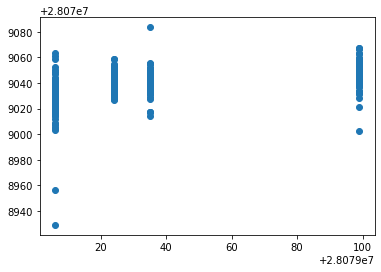

In [169]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [170]:
# Score

print(lr.score(x_test,y_test))

0.12944242122161376


In [171]:
print(lr.score(x_train,y_train))

0.12456713361993543


In [172]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [173]:
#Ridge Score
rr.score(x_test,y_test)

0.09181706072765117

In [174]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [175]:
# Lasso Score
la.score(x_test,y_test)

0.043927952489961286

In [176]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [177]:
print(en.coef_)

[ 1.69412521  0.         -3.94380259 -0.27723394  0.00783768  0.13485537]


In [178]:
print(en.intercept_)

28079042.61606745


In [179]:
print(en.predict(x_test))

[28079041.47677295 28079036.7371802  28079041.90778165 28079045.66591779
 28079042.57115775 28079042.50347779 28079046.85379447 28079043.32901237
 28079041.27368033 28079043.97785943 28079039.29514866 28079044.96372702
 28079045.75328744 28079032.49732193 28079049.42311737 28079047.53659949
 28079037.80653133 28079036.28331983 28079036.90028659 28079035.21602413
 28079037.45885415 28079039.55920068 28078980.07059148 28079041.50935833
 28079046.96129792 28079044.03328824 28079043.04657101 28079036.88244488
 28079046.90517515 28079047.366322   28079046.05703987 28079038.23325063
 28079042.79667863 28079044.08752211 28079026.09205873 28079042.20988414
 28079042.36526997 28079042.73028379 28079036.31360157 28079042.00714229
 28079035.65147171 28079025.64383582 28079047.61404948 28079048.37075068
 28079041.2722774  28079047.68124574 28079046.37758278 28079044.66803792
 28079044.95725133 28079047.11760502 28079046.66640528 28079049.50021319
 28079031.03457213 28079036.58154664 28079042.81194

In [180]:
print(en.score(x_test,y_test))

0.06493943408105607


In [181]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [182]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [184]:
observation=[[12,45,48,23,78,90]]
prediction=logr.predict(observation)

In [185]:
print(prediction)

[28079035]


In [186]:
logr.classes_

array([28079006, 28079024, 28079035, 28079099], dtype=int64)

In [187]:
logr.predict_proba(observation)[0][0]

9.17510940064562e-59

In [188]:
print(logr.score(x_test,y_test))

0.24378109452736318


In [189]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [190]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,13,20,45],
           'n_estimators':[12,51,32,42,65]}

In [191]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 13, 20, 45],
                         'n_estimators': [12, 51, 32, 42, 65]},
             scoring='accuracy')

In [192]:
grid_search.best_score_

0.6908315565031984

In [193]:
rfc_best=grid_search.best_estimator_

[Text(2197.125, 1494.8999999999999, 'X[2] <= 3.945\ngini = 0.741\nsamples = 581\nvalue = [292, 230, 167, 249]'),
 Text(1391.5125, 1223.1, 'X[3] <= 4.83\ngini = 0.727\nsamples = 411\nvalue = [95, 222, 140, 200]'),
 Text(781.2, 951.3, 'X[2] <= 1.095\ngini = 0.639\nsamples = 225\nvalue = [21, 192, 77, 82]'),
 Text(390.6, 679.4999999999999, 'X[4] <= 0.065\ngini = 0.448\nsamples = 68\nvalue = [0, 79, 25, 8]'),
 Text(195.3, 407.6999999999998, 'X[5] <= 26.685\ngini = 0.6\nsamples = 29\nvalue = [0, 21, 22, 6]'),
 Text(97.65, 135.89999999999986, 'gini = 0.0\nsamples = 10\nvalue = [0, 16, 0, 0]'),
 Text(292.95000000000005, 135.89999999999986, 'gini = 0.5\nsamples = 19\nvalue = [0, 5, 22, 6]'),
 Text(585.9000000000001, 407.6999999999998, 'X[3] <= 2.235\ngini = 0.149\nsamples = 39\nvalue = [0, 58, 3, 2]'),
 Text(488.25, 135.89999999999986, 'gini = 0.0\nsamples = 34\nvalue = [0, 52, 0, 0]'),
 Text(683.5500000000001, 135.89999999999986, 'gini = 0.595\nsamples = 5\nvalue = [0, 6, 3, 2]'),
 Text(1171.

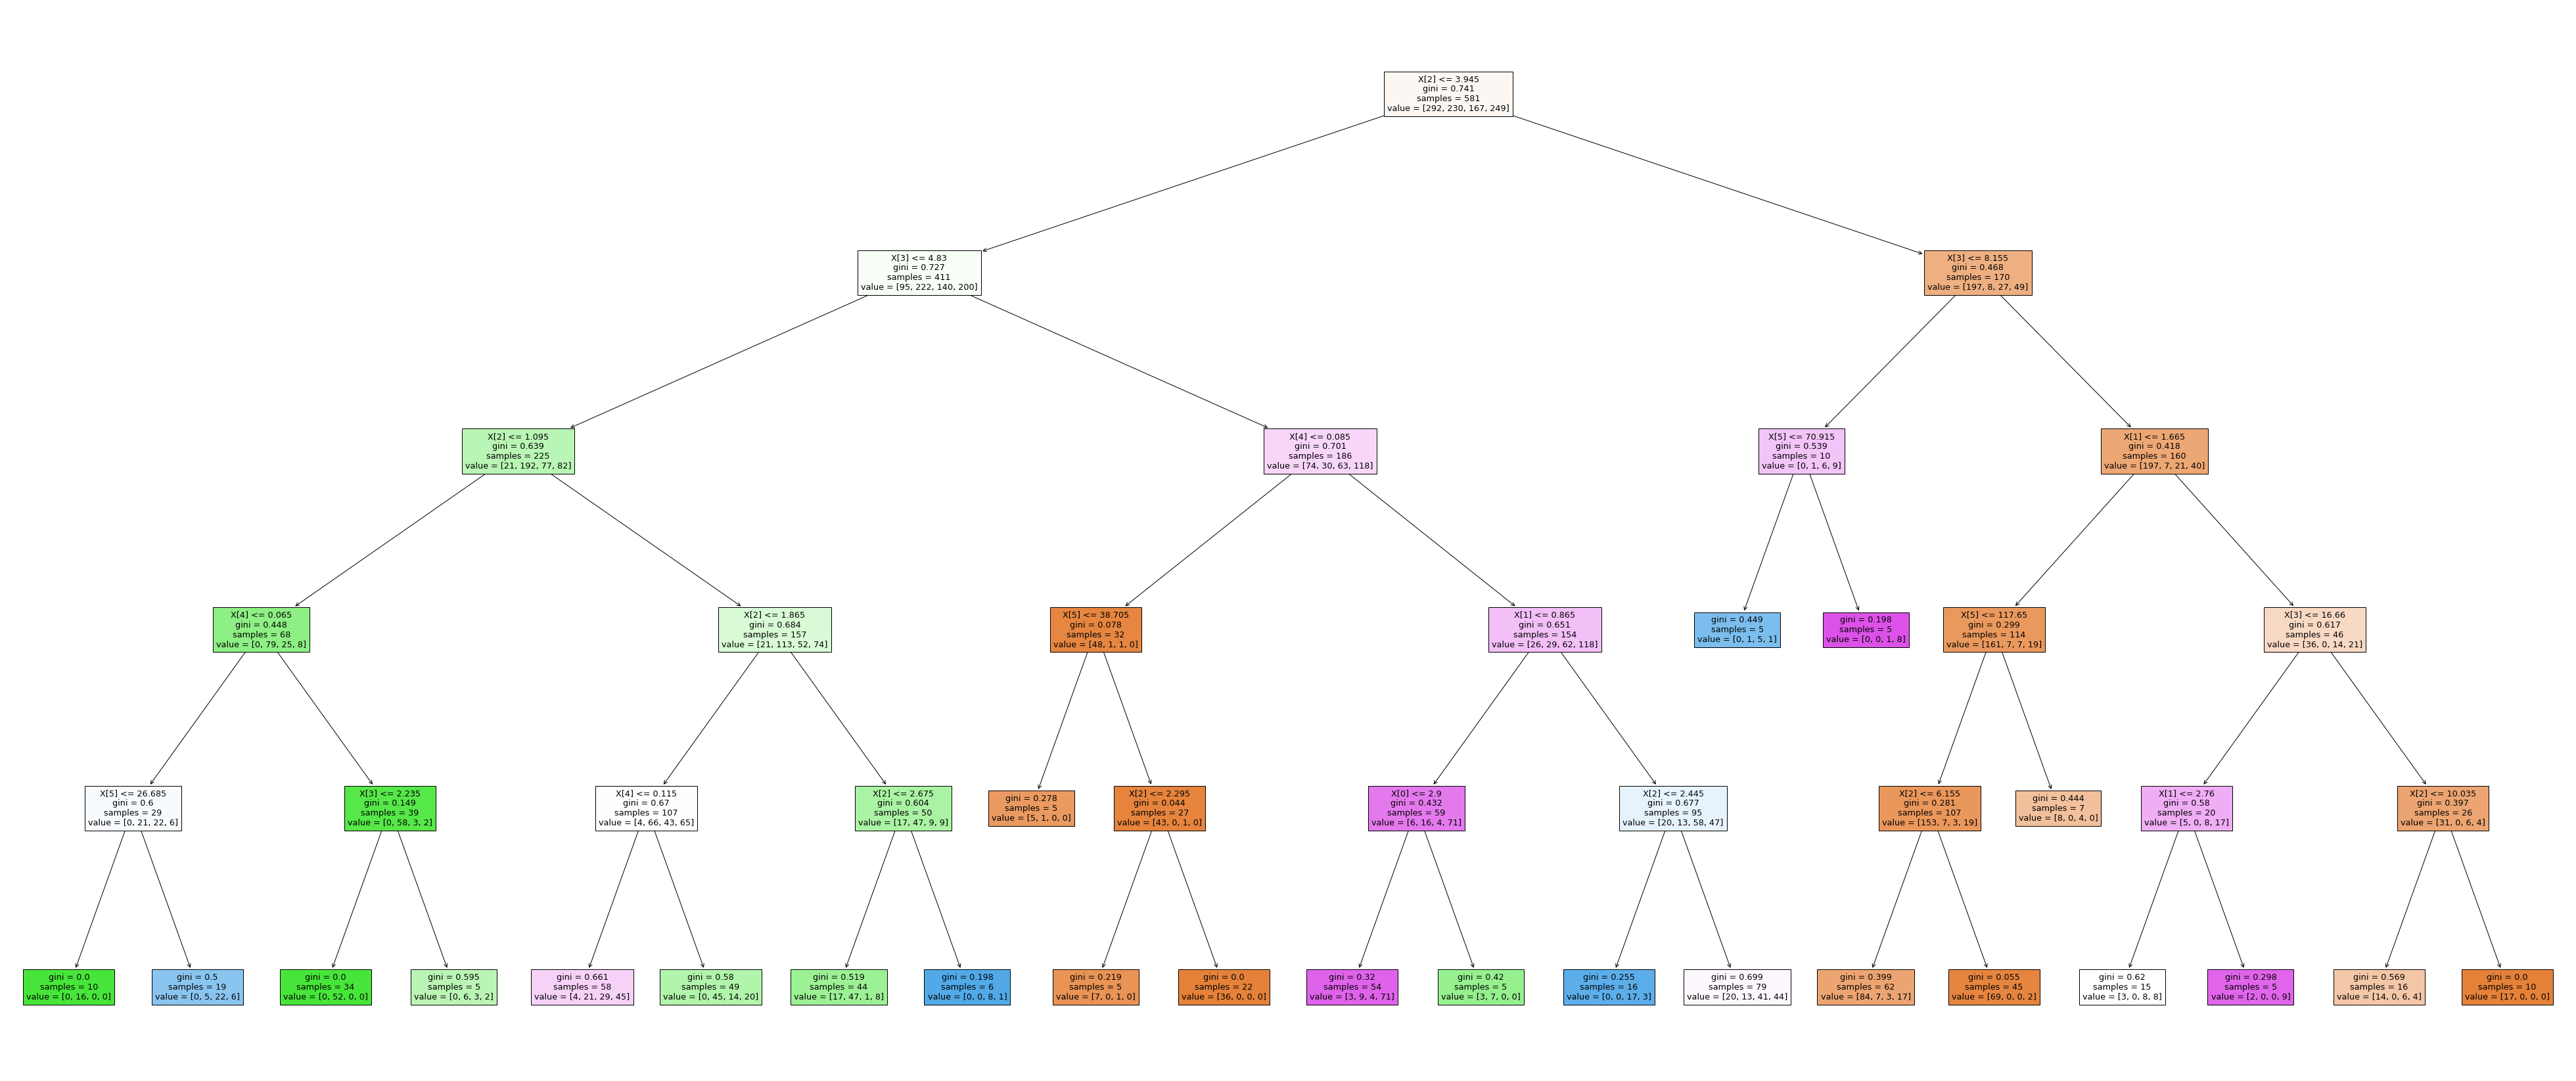

In [194]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.6908315565031984

# DataSet 2004

In [195]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2004.csv")
a=a.head(50000)
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2004-08-01 01:00:00,NaN,0.66,NaN,NaN,NaN,89.550003,118.900002,NaN,40.020000,39.990002,25.860001,NaN,12.200000,NaN,NaN,28079001
1,2004-08-01 01:00:00,2.66,0.54,2.99,6.08,0.18,51.799999,53.860001,3.28,51.689999,22.950001,NaN,3.38,6.120000,1.57,11.37,28079035
2,2004-08-01 01:00:00,NaN,1.02,NaN,NaN,NaN,93.389999,138.600006,NaN,20.860001,49.480000,NaN,NaN,8.990000,NaN,NaN,28079003
3,2004-08-01 01:00:00,NaN,0.53,NaN,NaN,NaN,87.290001,105.000000,NaN,36.730000,31.070000,NaN,NaN,8.820000,NaN,NaN,28079004
4,2004-08-01 01:00:00,NaN,0.17,NaN,NaN,NaN,34.910000,35.349998,NaN,86.269997,54.080002,NaN,NaN,8.710000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2004-03-14 13:00:00,NaN,0.42,NaN,NaN,NaN,38.070000,50.389999,NaN,60.299999,9.540000,NaN,NaN,18.010000,NaN,NaN,28079004
49996,2004-03-14 13:00:00,NaN,0.12,NaN,NaN,NaN,14.940000,20.059999,NaN,60.220001,6.460000,NaN,NaN,6.390000,NaN,NaN,28079039
49997,2004-03-14 13:00:00,1.75,0.56,1.38,2.86,0.08,47.490002,89.339996,1.46,47.070000,12.980000,5.980000,1.18,19.010000,1.26,5.40,28079006
49998,2004-03-14 13:00:00,NaN,0.43,NaN,NaN,0.12,32.970001,44.410000,NaN,59.610001,7.740000,NaN,NaN,30.030001,1.33,NaN,28079007


In [196]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
5,2004-08-01 01:00:00,3.24,0.63,5.55,9.72,0.06,103.800003,144.800003,5.04,32.480000,59.110001,38.049999,4.16,14.28,1.54,16.93,28079006
22,2004-08-01 01:00:00,0.55,0.36,0.54,0.86,0.07,31.980000,32.799999,0.50,79.040001,43.549999,22.780001,0.39,7.29,1.55,2.53,28079024
26,2004-08-01 01:00:00,1.80,0.46,2.28,4.62,0.21,62.259998,75.470001,2.47,54.419998,46.630001,29.459999,2.21,8.54,1.55,7.92,28079099
32,2004-08-01 02:00:00,1.94,0.67,3.14,4.91,0.06,113.500000,165.800003,2.56,26.980000,86.930000,45.639999,2.14,13.47,1.67,8.18,28079006
49,2004-08-01 02:00:00,0.29,0.30,0.47,0.76,0.07,33.919998,34.840000,0.46,75.570000,48.959999,25.959999,0.34,6.38,1.41,1.52,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49963,2004-03-14 11:00:00,0.99,0.43,0.78,1.38,0.09,31.830000,53.700001,0.87,38.430000,23.180000,17.400000,0.60,12.85,1.30,2.77,28079099
49969,2004-03-14 12:00:00,2.02,0.61,1.32,2.66,0.09,49.119999,95.489998,1.34,36.730000,20.770000,13.880000,1.09,17.85,1.28,5.74,28079006
49987,2004-03-14 12:00:00,0.98,0.27,0.55,0.93,0.08,26.760000,36.040001,0.50,57.349998,13.820000,10.440000,0.39,13.71,1.28,2.44,28079024
49991,2004-03-14 12:00:00,1.16,0.42,0.91,1.56,0.09,31.879999,52.540001,0.90,45.560001,21.820000,16.120001,0.68,14.34,1.29,3.74,28079099


In [197]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4120 entries, 5 to 49997
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     4120 non-null   object 
 1   BEN      4120 non-null   float64
 2   CO       4120 non-null   float64
 3   EBE      4120 non-null   float64
 4   MXY      4120 non-null   float64
 5   NMHC     4120 non-null   float64
 6   NO_2     4120 non-null   float64
 7   NOx      4120 non-null   float64
 8   OXY      4120 non-null   float64
 9   O_3      4120 non-null   float64
 10  PM10     4120 non-null   float64
 11  PM25     4120 non-null   float64
 12  PXY      4120 non-null   float64
 13  SO_2     4120 non-null   float64
 14  TCH      4120 non-null   float64
 15  TOL      4120 non-null   float64
 16  station  4120 non-null   int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 579.4+ KB


In [198]:
x=b.iloc[:,1:11]
y=b.iloc[:,-1]

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [200]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [201]:
print(lr.intercept_)

28079072.137645256


In [202]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-4.425245
CO,17.473185
EBE,8.032199
MXY,-3.439863
NMHC,110.877985
NO_2,-0.285648
NOx,-0.202185
OXY,2.034265
O_3,-0.383639
PM10,0.141106


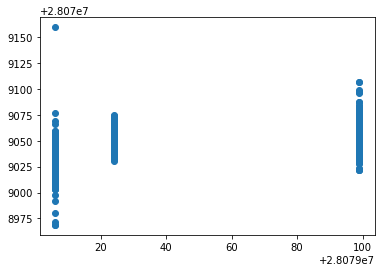

In [203]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [204]:
# Score

print(lr.score(x_test,y_test))

0.19002600190427243


In [205]:
print(lr.score(x_train,y_train))

0.14047811584013625


In [206]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [207]:
#Ridge Score
rr.score(x_test,y_test)

0.1708646981431241

In [208]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [209]:
# Lasso Score
la.score(x_test,y_test)

0.06699660579573807

In [210]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [211]:
print(en.coef_)

[-0.15662143  0.19829315  4.35207758 -1.58953698  0.51491867 -0.27272659
 -0.05284969 -0.         -0.3104973   0.23703319]


In [212]:
print(en.intercept_)

28079071.10114038


In [213]:
print(en.predict(x_test))

[28079037.34648909 28079049.5157867  28079021.26190909 ...
 28079052.11438948 28079037.12212903 28079052.0817004 ]


In [214]:
print(en.score(x_test,y_test))

0.10299301614187473


In [215]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [216]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [217]:
observation=[[12,45,48,23,78,21,56,64,23,81]]
prediction=logr.predict(observation)

In [218]:
print(prediction)

[28079099]


In [219]:
logr.classes_

array([28079006, 28079024, 28079099], dtype=int64)

In [220]:
logr.predict_proba(observation)[0][0]

5.936908291833921e-59

In [221]:
print(logr.score(x_test,y_test))

0.3794498381877023


In [222]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [223]:
parameters={'max_depth':[51,78,95,62,35],
           'min_samples_leaf':[5,10,13,20,45],
           'n_estimators':[78,53,32,42,65]}

In [224]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [51, 78, 95, 62, 35],
                         'min_samples_leaf': [5, 10, 13, 20, 45],
                         'n_estimators': [78, 53, 32, 42, 65]},
             scoring='accuracy')

In [225]:
grid_search.best_score_

0.8689320388349514

In [226]:
rfc_best=grid_search.best_estimator_

[Text(836.5159632506983, 1576.44, 'X[3] <= 1.405\ngini = 0.65\nsamples = 1835\nvalue = [1118, 659, 1107]'),
 Text(120.0167597765363, 1467.72, 'X[6] <= 34.73\ngini = 0.182\nsamples = 328\nvalue = [14, 455, 36]'),
 Text(43.642458100558656, 1359.0, 'X[6] <= 20.26\ngini = 0.056\nsamples = 245\nvalue = [0, 370, 11]'),
 Text(21.821229050279328, 1250.28, 'gini = 0.0\nsamples = 171\nvalue = [0, 259, 0]'),
 Text(65.46368715083798, 1250.28, 'X[7] <= 1.04\ngini = 0.164\nsamples = 74\nvalue = [0, 111, 11]'),
 Text(43.642458100558656, 1141.56, 'X[7] <= 0.745\ngini = 0.068\nsamples = 67\nvalue = [0, 109, 4]'),
 Text(21.821229050279328, 1032.84, 'gini = 0.0\nsamples = 46\nvalue = [0, 76, 0]'),
 Text(65.46368715083798, 1032.84, 'X[7] <= 0.795\ngini = 0.193\nsamples = 21\nvalue = [0, 33, 4]'),
 Text(43.642458100558656, 924.12, 'gini = 0.426\nsamples = 6\nvalue = [0, 9, 4]'),
 Text(87.28491620111731, 924.12, 'gini = 0.0\nsamples = 15\nvalue = [0, 24, 0]'),
 Text(87.28491620111731, 1141.56, 'gini = 0.346

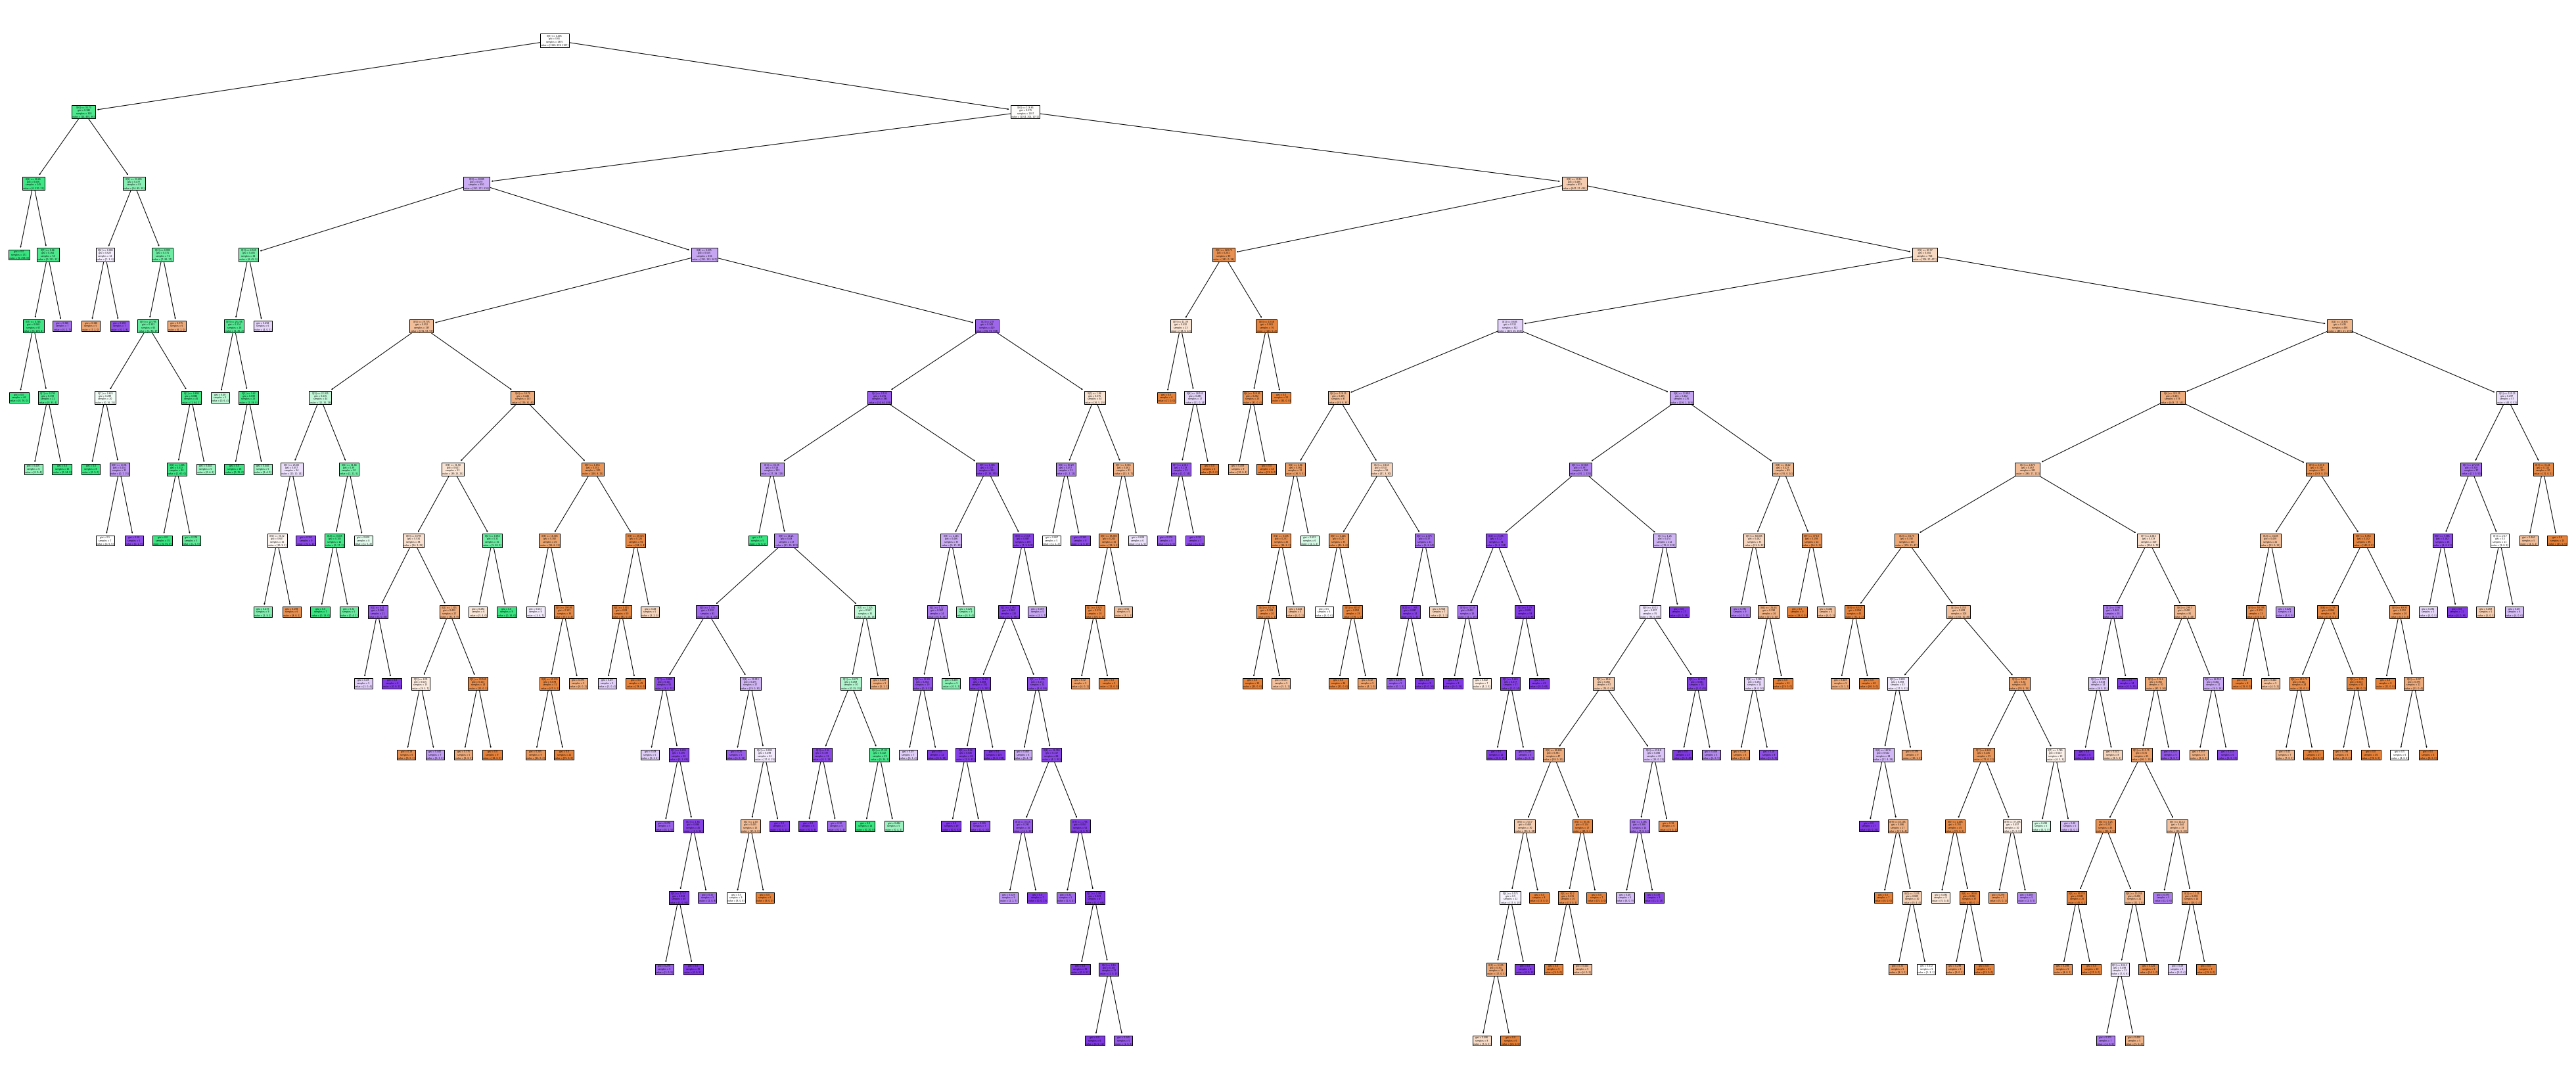

In [227]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.8689320388349514

# DataSet 2005

In [228]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2005.csv")
a=a.head(100000)
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2005-11-01 01:00:00,NaN,0.77,NaN,NaN,NaN,57.130001,128.699997,NaN,14.720000,14.910000,10.65,NaN,4.62,NaN,NaN,28079001
1,2005-11-01 01:00:00,1.52,0.65,1.49,4.57,0.25,86.559998,181.699997,1.27,11.680000,30.930000,NaN,1.59,7.80,1.35,7.98,28079035
2,2005-11-01 01:00:00,NaN,0.40,NaN,NaN,NaN,46.119999,53.000000,NaN,30.469999,14.600000,NaN,NaN,5.76,NaN,NaN,28079003
3,2005-11-01 01:00:00,NaN,0.42,NaN,NaN,NaN,37.220001,52.009998,NaN,21.379999,15.160000,NaN,NaN,6.60,NaN,NaN,28079004
4,2005-11-01 01:00:00,NaN,0.57,NaN,NaN,NaN,32.160000,36.680000,NaN,33.410000,5.000000,NaN,NaN,3.00,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2005-03-31 00:00:00,NaN,0.38,NaN,NaN,NaN,66.160004,82.919998,NaN,21.120001,6.410000,NaN,NaN,14.43,NaN,NaN,28079016
99996,2005-03-31 00:00:00,NaN,0.71,NaN,NaN,NaN,90.610001,162.699997,NaN,6.690000,31.879999,NaN,NaN,8.31,NaN,NaN,28079017
99997,2005-03-31 00:00:00,NaN,1.26,NaN,NaN,NaN,72.070000,110.800003,NaN,3.320000,10.850000,NaN,NaN,11.22,NaN,NaN,28079018
99998,2005-03-31 00:00:00,NaN,0.61,NaN,NaN,NaN,87.690002,160.600006,NaN,10.100000,12.730000,NaN,NaN,7.71,NaN,NaN,28079019


In [229]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
5,2005-11-01 01:00:00,1.92,0.88,2.44,5.14,0.22,90.309998,207.699997,2.78,13.760000,18.070000,17.600000,2.44,10.39,1.38,7.390000,28079006
22,2005-11-01 01:00:00,0.30,0.22,0.25,0.59,0.11,18.540001,19.020000,0.67,46.799999,9.880000,6.020000,1.00,6.94,1.29,0.980000,28079024
25,2005-11-01 01:00:00,0.67,0.49,0.94,3.44,0.17,48.740002,74.349998,1.57,23.430000,13.880000,10.260000,1.68,6.20,1.45,3.450000,28079099
31,2005-11-01 02:00:00,3.10,0.84,3.21,6.82,0.22,89.919998,224.199997,3.72,12.390000,28.740000,21.870001,3.26,10.60,1.38,11.150000,28079006
48,2005-11-01 02:00:00,0.39,0.20,0.29,0.68,0.11,16.639999,17.080000,0.40,47.689999,8.780000,5.350000,0.61,6.89,1.29,1.440000,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99929,2005-03-30 22:00:00,4.53,1.33,5.20,11.31,0.22,116.400002,247.699997,5.69,8.340000,36.529999,25.590000,4.54,15.97,1.49,17.129999,28079006
99951,2005-03-30 22:00:00,1.56,0.78,1.86,5.03,0.17,78.290001,126.300003,2.80,14.660000,22.590000,17.660000,2.64,10.76,1.39,6.620000,28079099
99957,2005-03-30 23:00:00,4.49,1.24,4.85,10.55,0.21,116.400002,247.300003,5.38,7.890000,40.910000,26.240000,4.31,14.83,1.48,16.700001,28079006
99979,2005-03-30 23:00:00,1.95,0.73,2.09,4.90,0.16,79.309998,126.699997,2.92,12.940000,22.580000,16.290001,3.08,10.63,1.39,8.170000,28079099


In [230]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8322 entries, 5 to 99985
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8322 non-null   object 
 1   BEN      8322 non-null   float64
 2   CO       8322 non-null   float64
 3   EBE      8322 non-null   float64
 4   MXY      8322 non-null   float64
 5   NMHC     8322 non-null   float64
 6   NO_2     8322 non-null   float64
 7   NOx      8322 non-null   float64
 8   OXY      8322 non-null   float64
 9   O_3      8322 non-null   float64
 10  PM10     8322 non-null   float64
 11  PM25     8322 non-null   float64
 12  PXY      8322 non-null   float64
 13  SO_2     8322 non-null   float64
 14  TCH      8322 non-null   float64
 15  TOL      8322 non-null   float64
 16  station  8322 non-null   int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 1.1+ MB


In [231]:
x=b.iloc[:,1:5]
y=b.iloc[:,-1]

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [233]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [234]:
print(lr.intercept_)

28079048.74110003


In [235]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff


,Co-efficient
BEN,-7.851365
CO,20.897177
EBE,-8.344554
MXY,3.468114


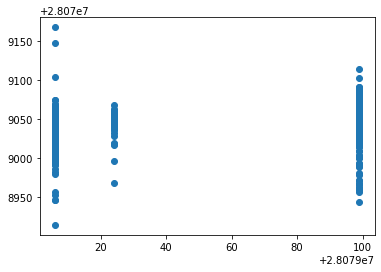

In [237]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [238]:
# Score

print(lr.score(x_test,y_test))

0.12481005997424299


In [239]:
print(lr.score(x_train,y_train))

0.10546068672403286


In [240]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [241]:
#Ridge Score
rr.score(x_test,y_test)

0.1249521508803264

In [242]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [243]:
# Lasso Score
la.score(x_test,y_test)

0.04626717826141902

In [244]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [245]:
print(en.coef_)

[-3.24359596  1.83159198 -5.19831277  2.05628912]


In [246]:
print(en.intercept_)

28079053.864451736


In [247]:
print(en.predict(x_test))

[28079047.09726541 28079052.08647469 28079052.66582835 ...
 28079051.048212   28079051.33638781 28079033.50947631]


In [248]:
print(en.score(x_test,y_test))

0.09749942116118848


In [249]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [250]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [252]:
observation=[[12,45,48,78]]
prediction=logr.predict(observation)

In [253]:
print(prediction)

[28079099]


In [254]:
logr.classes_

array([28079006, 28079024, 28079099], dtype=int64)

In [255]:
logr.predict_proba(observation)[0][0]

7.605263040790306e-26

In [258]:
print(logr.score(x_test,y_test))

0.5234281137364838


In [259]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [260]:
parameters={'max_depth':[1,98,3,78,53],
           'min_samples_leaf':[5,10,13,32,45],
           'n_estimators':[12,51,32,42,65]}

In [261]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 98, 3, 78, 53],
                         'min_samples_leaf': [5, 10, 13, 32, 45],
                         'n_estimators': [12, 51, 32, 42, 65]},
             scoring='accuracy')

In [262]:
grid_search.best_score_

0.8169950543791944

In [263]:
rfc_best=grid_search.best_estimator_

[Text(1625.8978729248047, 2650.05, 'X[3] <= 1.025\ngini = 0.626\nsamples = 3676\nvalue = [2461, 989, 2375]'),
 Text(219.65305397727272, 2514.15, 'X[0] <= 0.205\ngini = 0.366\nsamples = 467\nvalue = [82, 586, 82]'),
 Text(102.6434659090909, 2378.25, 'X[3] <= 0.17\ngini = 0.42\nsamples = 35\nvalue = [35, 15, 0]'),
 Text(89.96164772727272, 2242.35, 'gini = 0.0\nsamples = 16\nvalue = [21, 0, 0]'),
 Text(115.3252840909091, 2242.35, 'gini = 0.499\nsamples = 19\nvalue = [14, 15, 0]'),
 Text(336.66264204545456, 2378.25, 'X[3] <= 0.995\ngini = 0.316\nsamples = 432\nvalue = [47, 571, 82]'),
 Text(140.68892045454544, 2242.35, 'X[2] <= 0.425\ngini = 0.428\nsamples = 267\nvalue = [37, 313, 80]'),
 Text(63.40909090909091, 2106.45, 'X[2] <= 0.385\ngini = 0.055\nsamples = 95\nvalue = [2, 138, 2]'),
 Text(25.363636363636363, 1970.55, 'X[0] <= 0.535\ngini = 0.019\nsamples = 70\nvalue = [1, 105, 0]'),
 Text(12.681818181818182, 1834.65, 'gini = 0.0\nsamples = 49\nvalue = [0, 75, 0]'),
 Text(38.04545454545

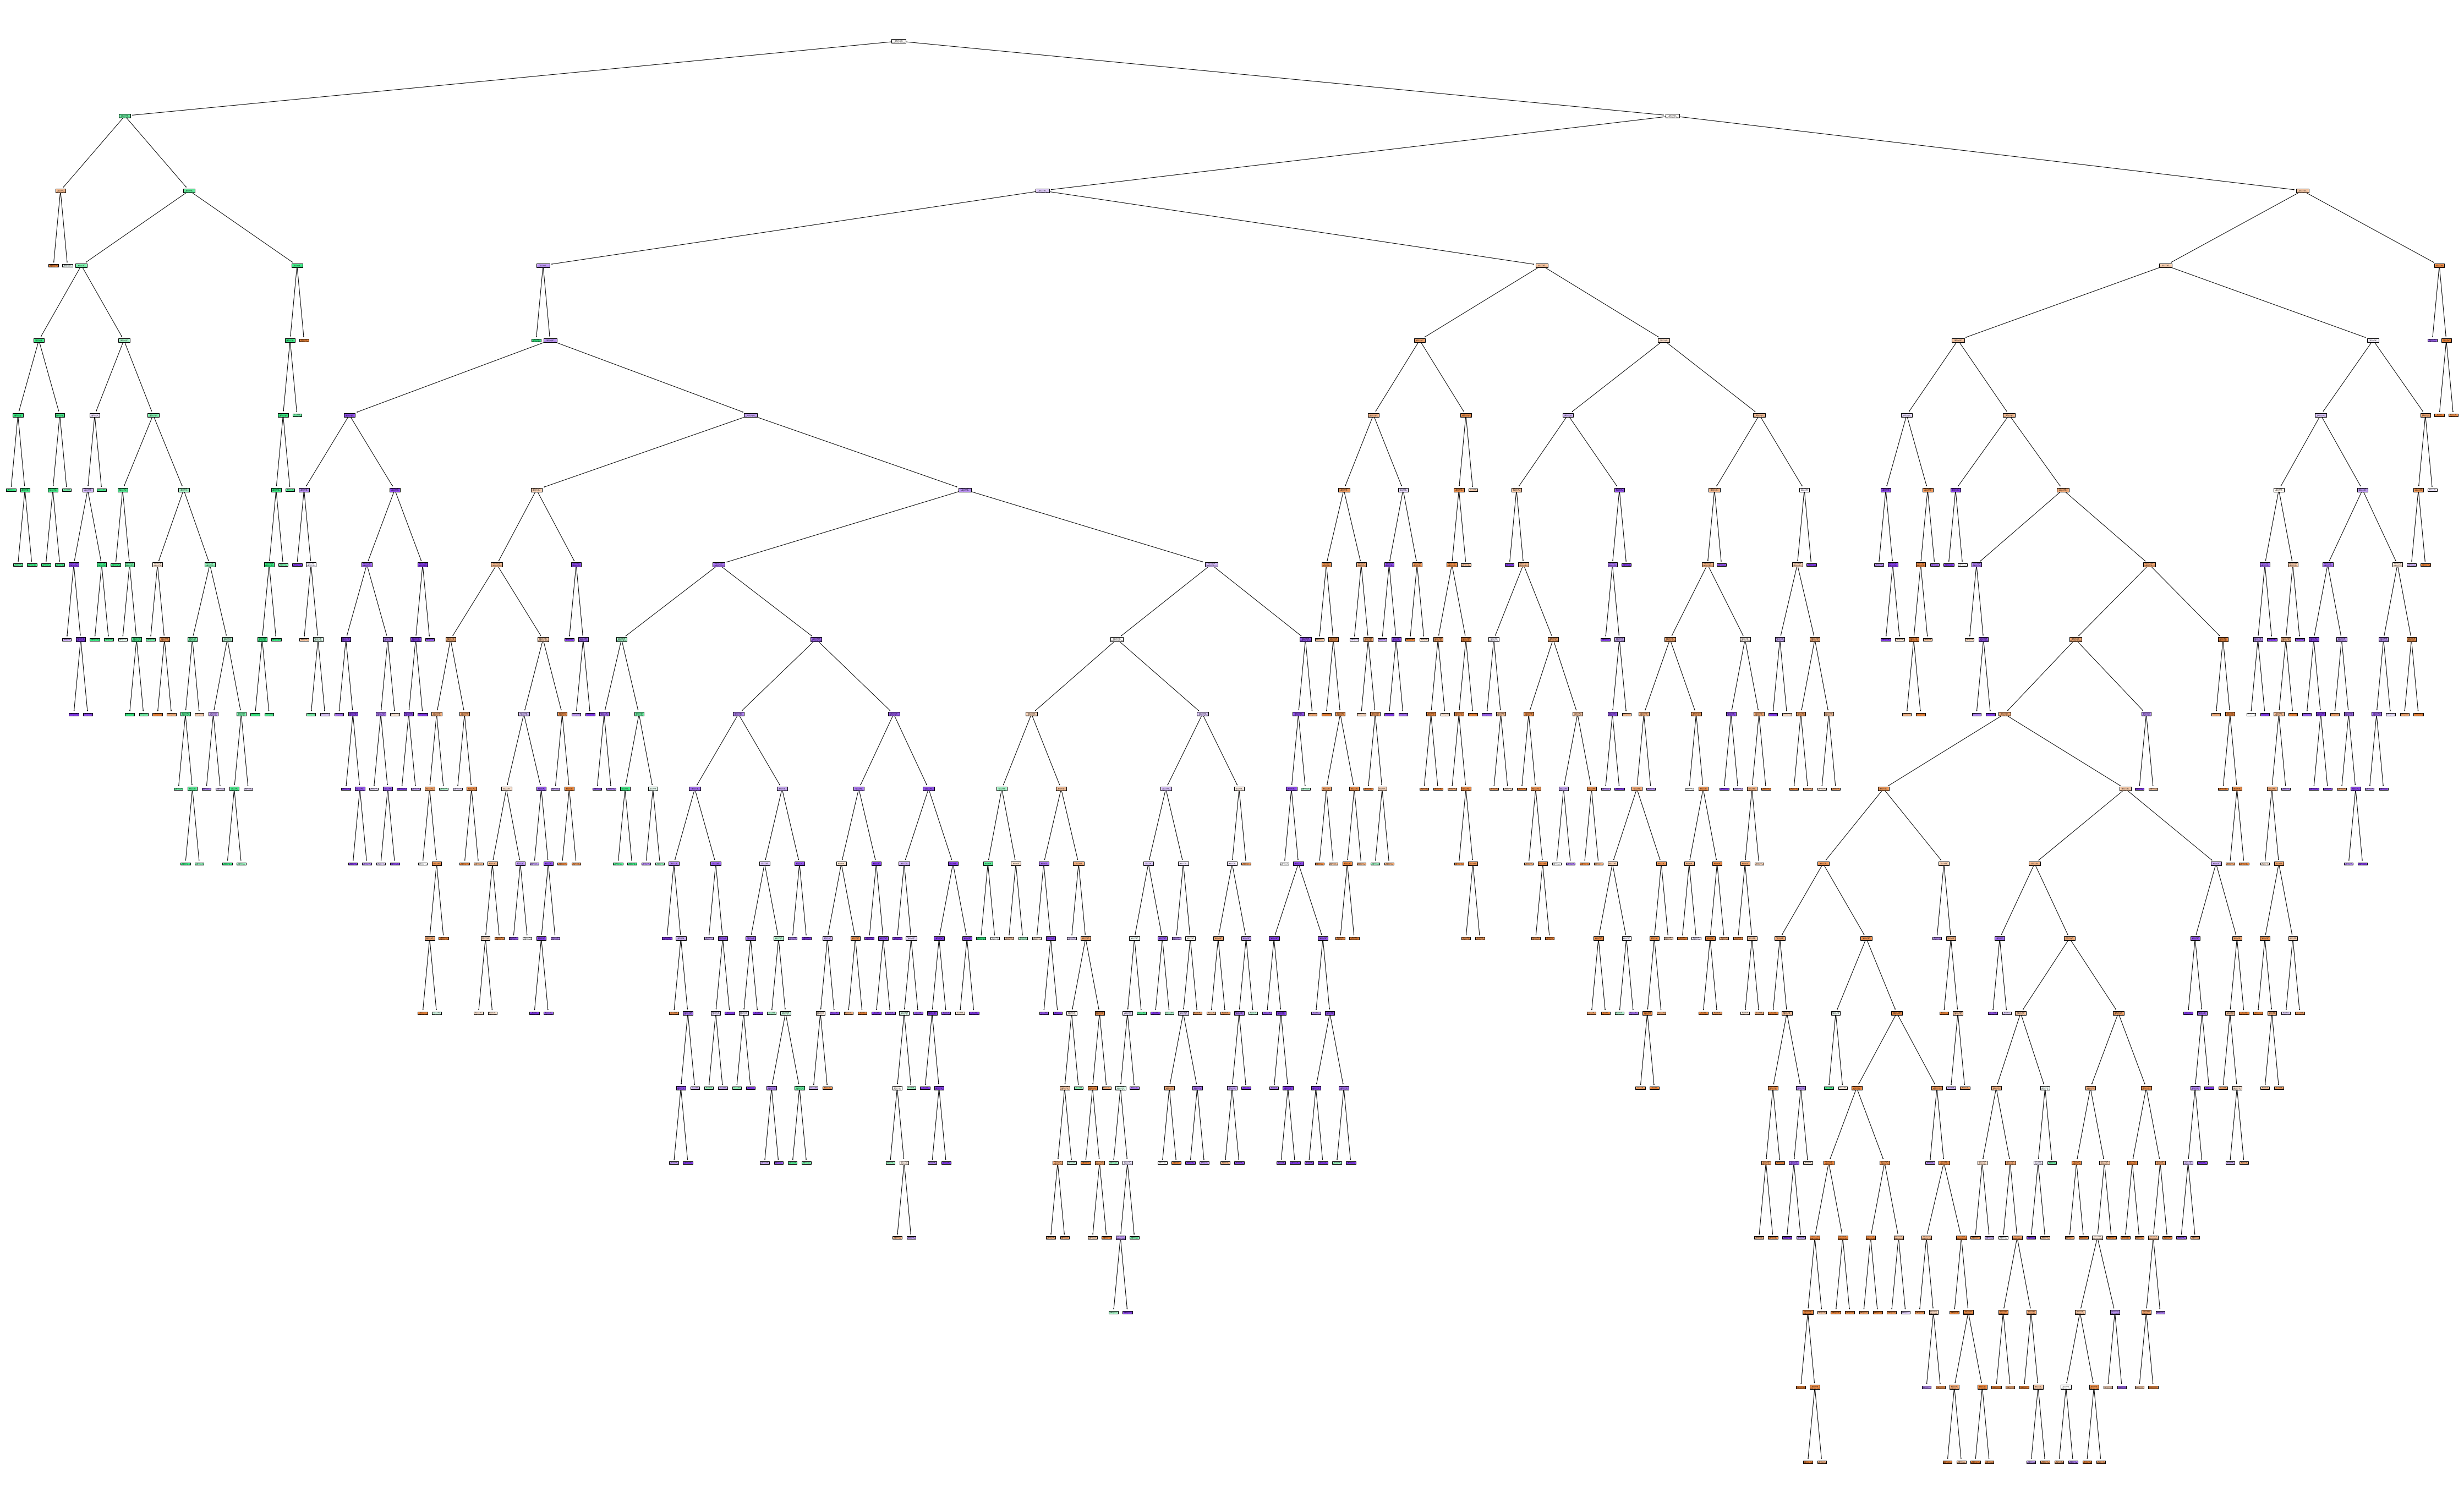

In [264]:
plt.figure(figsize=(80,50))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.8169950543791944